<a href="https://colab.research.google.com/github/S-Muaz/precog-recruitment-task/blob/main/Task%20C/Task_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [2]:
# Paths to the meme and non-meme image folders
meme_folder = '/content/drive/MyDrive/classification_dataset/memes_dataset/train/meme'
non_meme_folder = '/content/drive/MyDrive/classification_dataset/memes_dataset/train/not_meme'


In [3]:
# Load the images and create the labels
X = []
y = []

# Load meme images
for img_file in os.listdir(meme_folder):
    img_path = os.path.join(meme_folder, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))  # Resize the image to a fixed size
    X.append(img)
    y.append(1)  # Meme label

# Load non-meme images
for img_file in os.listdir(non_meme_folder):
    img_path = os.path.join(non_meme_folder, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))  # Resize the image to a fixed size
    X.append(img)
    y.append(0)  # Non-meme label


In [4]:
# Convert the image data to a numpy array
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

# Classification report
print(classification_report(y_test, y_pred_binary))

Epoch 1/10
33/33 [==============================] - 10s 267ms/step - loss: 0.6259 - accuracy: 0.6325 - val_loss: 0.3953 - val_accuracy: 0.8456
Epoch 2/10
33/33 [==============================] - 8s 254ms/step - loss: 0.3192 - accuracy: 0.8772 - val_loss: 0.3145 - val_accuracy: 0.8687
Epoch 3/10
33/33 [==============================] - 7s 218ms/step - loss: 0.3204 - accuracy: 0.8801 - val_loss: 0.2761 - val_accuracy: 0.8958
Epoch 4/10
33/33 [==============================] - 8s 248ms/step - loss: 0.2540 - accuracy: 0.9033 - val_loss: 0.3252 - val_accuracy: 0.8764
Epoch 5/10
33/33 [==============================] - 7s 213ms/step - loss: 0.2325 - accuracy: 0.9149 - val_loss: 0.2411 - val_accuracy: 0.9266
Epoch 6/10
33/33 [==============================] - 8s 256ms/step - loss: 0.1757 - accuracy: 0.9439 - val_loss: 0.2214 - val_accuracy: 0.9266
Epoch 7/10
33/33 [==============================] - 7s 199ms/step - loss: 0.1452 - accuracy: 0.9526 - val_loss: 0.2765 - val_accuracy: 0.8958
Epoch

In [9]:
test_image_path = '/content/drive/MyDrive/classification_dataset/memes_dataset/test/meme/01235.png'   # test image path
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (64, 64))  # Resize the image to a fixed size
test_image_normalized = test_image / 255.0  # Normalize pixel values
prediction = model.predict(np.expand_dims(test_image_normalized, axis=0))
prediction_label = "Meme" if prediction[0][0] > 0.5 else "Non-meme"

1/1 [==============================] - 0s 37ms/step


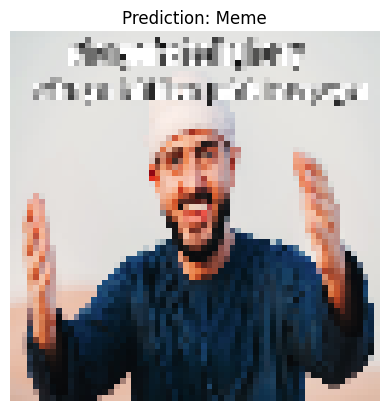

In [10]:
# Plot the test image
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {prediction_label}")
plt.axis('off')
plt.show()
